In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
df_train = pd.read_csv(r'D:\program\pycharm\model\Data\隧道围岩项目\训练集.csv')
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 1]

In [3]:
svm = joblib.load(r'..\saved_models\svm.pkl')

  0%|          | 0/10 [00:00<?, ?it/s]

AssertionError: Feature and SHAP matrices must have the same number of rows!

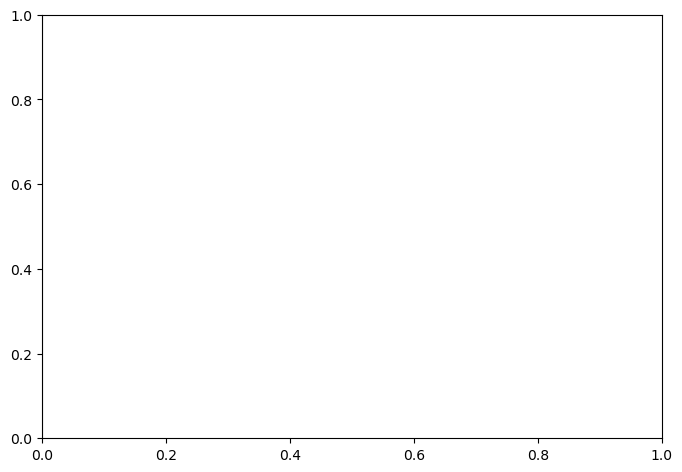

In [50]:
svm = joblib.load(r'..\saved_models\svm.pkl')
e = shap.KernelExplainer(svm.predict, X[:10])
shap_values = e.shap_values(X[:10])
shap.summary_plot(shap_values, X)

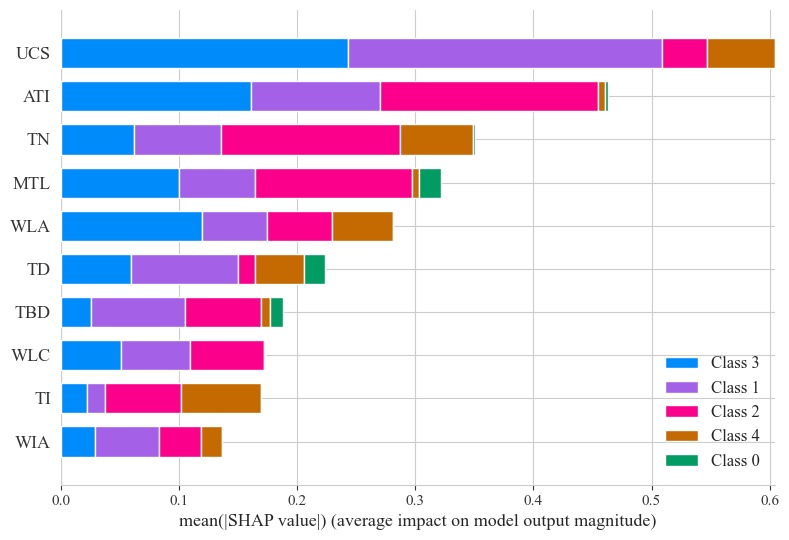

[array([[ 0.        ,  0.        ,  0.        , ...,  0.02119422,
          0.03455393,  0.15940426],
        [ 0.        ,  0.        ,  0.        , ..., -0.00115153,
         -0.00175332, -0.00682884],
        [ 0.        ,  0.        ,  0.        , ..., -0.00115153,
         -0.00175332, -0.00682884],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.00115153,
         -0.00175332, -0.00682884],
        [ 0.        ,  0.        ,  0.        , ..., -0.00115153,
         -0.00175332, -0.00682884],
        [ 0.        ,  0.        ,  0.        , ..., -0.00115153,
         -0.00175332, -0.00682884]], dtype=float32),
 array([[ 0.01827387, -0.00621264,  0.05442461, ...,  0.09124199,
         -0.10588984, -0.08436374],
        [ 0.03451842, -0.08082611, -0.04064669, ...,  0.01577225,
         -0.04489336,  0.02767493],
        [-0.03306675, -0.09924077, -0.00225562, ..., -0.09484322,
         -0.06716215, -0.08532007],
        ...,
        [-0.04029582, -0.02320907,  0.0

In [5]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
xgb = joblib.load(r'D:\program\pycharm\model\neural\土木\saved_models\xgb.pkl')
e = shap.Explainer(xgb)
shap_values = e.shap_values(X)
shap.summary_plot(shap_values, X)
shap_values

In [35]:
df_

,0,1,2,3,4,sum
2,0.000000,0.054288,0.034724,0.029208,0.018427,0.136648
4,0.000000,0.014641,0.064850,0.022560,0.067101,0.169152
0,0.000000,0.058437,0.062236,0.051017,0.001068,0.172758
9,0.010871,0.078907,0.064714,0.025924,0.007884,0.188300
3,0.018263,0.090071,0.014510,0.059661,0.041260,0.223765
1,0.000000,0.055371,0.055172,0.119385,0.051403,0.281331
6,0.019007,0.063914,0.132687,0.100354,0.006114,0.322076
7,0.001948,0.073949,0.151625,0.061516,0.061564,0.350603
8,0.003057,0.109427,0.184388,0.160872,0.005570,0.463313
5,0.000000,0.265797,0.037979,0.243129,0.057888,0.604793


<AxesSubplot:>

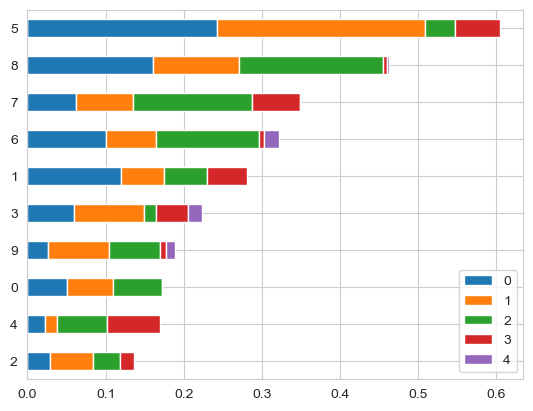

In [36]:
df_ = pd.concat([pd.Series(np.mean(np.abs(shap_values[a]), axis=0)) for a in range(5)], axis=1)
df_['sum'] = np.sum(df_, axis=1)
df_ = df_.sort_values(by='sum', axis=0, ascending=True)
df_[[0, 1, 2, 3, 4]] = df_[[3, 1, 2, 4, 0]]
df_.drop(columns='sum').plot.barh(stacked=True)

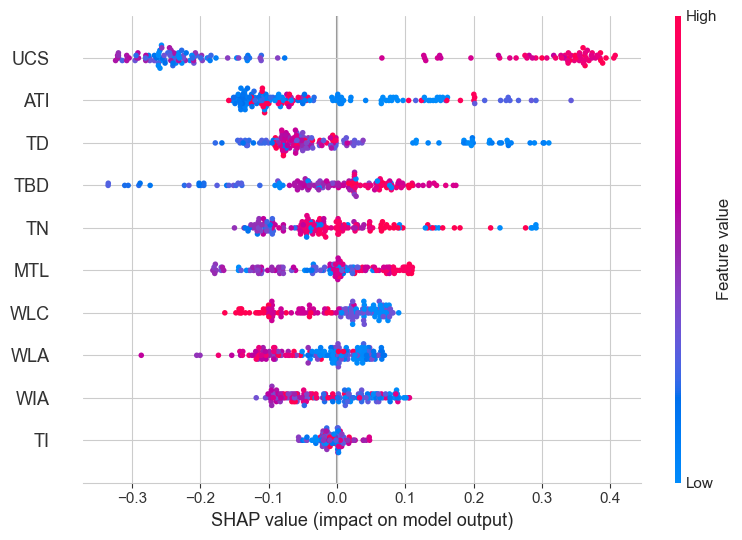

In [33]:
shap.summary_plot(shap_values[1], X)

In [58]:
xgb = joblib.load(r'D:\program\pycharm\model\neural\土木\saved_models\gbrt.pkl')
e = shap.TreeExplainer(xgb)
shap_values = e.shap_values(X)
shap.summary_plot(shap_values, X)

InvalidModelError: GradientBoostingClassifier is only supported for binary classification right now!

  feature_name  importance
5          UCS    0.304090
8          ATI    0.162400
7           TN    0.134727
6          MTL    0.077879
3           TD    0.076471
1          WLA    0.073410
2          WIA    0.060111
0          WLC    0.048867
9          TBD    0.041616
4           TI    0.020429


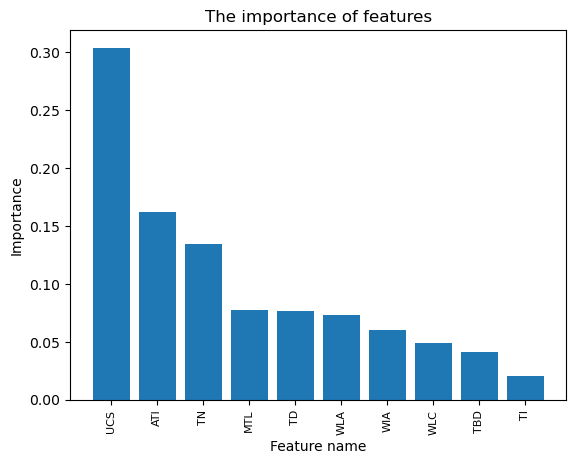

In [62]:
def plot_feature_importance(dataset, model_bst):
    list_feature_name = list(dataset.columns[1:])
    # list_feature_importance = list(model_bst.feature_importance(importance_type='split', iteration=-1))
    list_feature_importance = list(model_bst.feature_importances_)
    dataframe_feature_importance = pd.DataFrame(
        {'feature_name': list_feature_name, 'importance': list_feature_importance})
    dataframe_feature_importance20 = dataframe_feature_importance.sort_values(by='importance', ascending=False)[:20]
    print(dataframe_feature_importance20)
    x = range(len(dataframe_feature_importance20['feature_name']))
    plt.xticks(x, dataframe_feature_importance20['feature_name'], rotation=90, fontsize=8)
    plt.bar(x, dataframe_feature_importance20['importance'])
    plt.xlabel("Feature name")
    plt.ylabel("Importance")
    plt.title("The importance of features")
    plt.show()


data = pd.read_csv(r'D:\program\pycharm\model\Data\隧道围岩项目\训练集.csv')
plot_feature_importance(data, xgb)

In [23]:
gbrt = joblib.load(r'..\saved_models\gbrt.pkl')
xgb = joblib.load(r'..\saved_models\xgb.pkl')
svm = joblib.load('..\saved_models\svm.pkl')
mlp = joblib.load(r'..\saved_models\mlp.pkl')
df_test = pd.read_excel(r'..\..\..\Data\隧道围岩项目\测试集.xlsx', sheet_name='Sheet1')
df_test.dropna(axis=0, inplace=True)
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

In [27]:
print('gbrt\'s score is {}'.format(gbrt.score(X_test, y_test)))
print('xgb\'s score is {}'.format(xgb.score(X_test, y_test - 1)))
print('mlp\'s score is {}'.format(mlp.score(X_test, y_test)))
print('svm\'s score is {}'.format(svm.score(X_test, y_test)))

gbrt's score is 0.723404255319149
xgb's score is 0.8297872340425532
mlp's score is 0.44680851063829785
svm's score is 0.48936170212765956


In [24]:
import seaborn as sns
df_res = pd.DataFrame(columns=['真实值', 'gbrt预测值', 'xgb预测值', 'mlp预测值', 'svm预测值'])
df_res['真实值'] = y_test
df_res['gbrt预测值'] = gbrt.predict(X_test)
df_res['xgb预测值'] = xgb.predict(X_test)+1
df_res['mlp预测值'] = mlp.predict(X_test)
df_res['svm预测值'] = svm.predict(X_test)
df_res

,真实值,gbrt预测值,xgb预测值,mlp预测值,svm预测值
0,4,2,4,2,3
1,4,3,4,4,4
2,2,2,2,2,2
3,2,2,2,2,2
4,2,2,2,2,2
...,...,...,...,...,...
90,3,3,3,3,4
91,2,4,2,2,2
92,3,3,3,3,4
93,3,3,3,4,2


In [25]:
plt.rcParams['font.sans-serif'] = ['SimHei']
df_1 = pd.DataFrame(index=[str(int(i)) for i in range(1, 6)], columns=[str(i) for i in range(1, 6)])
for i in range(5):
    for j in range(5):
        df_1.iloc[i, j] = df_res[(df_res['真实值'] == i + 1) & (df_res['gbrt预测值'] == j + 1)].shape[0]
df_1

,1,2,3,4,5
1,0,0,0,0,0
2,0,19,2,12,0
3,0,4,25,1,0
4,0,5,2,24,0
5,0,0,0,0,0
